# Implementation example

### Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import Model
import numpy as np
import operator as op
from functools import reduce
import numpy as np
import math
import matplotlib.pyplot as plt

### Some auxiliar functions

In [4]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def normalize(xs):
    min_xs = np.min(xs)
    max_xs = np.max(xs)
    return (xs-min_xs)/(max_xs-min_xs)

### Rational base (different can be used)

In [5]:
def f(t):
    return t
def g(t):
    return (1-t)

## Neural network implementation

In [6]:
class first_layer(layers.Layer):
    def __init__(self, units=5,input_dim=1, activation = None):
        super(first_layer, self).__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        self.w = self.add_weight(shape=(1,self.units), initializer='ones',trainable=True) 
    def call(self,inputs):
        l = len(t)
        u = [ncr(n-1,i)*self.w[0][i]*(f(inputs)**i)*(g(inputs)**(n-1-i)) for i in range(n)] 
        out= tf.reshape(u/np.sum(np.array(u)),(1,self.units))
        # out= tf.abs(tf.reshape(u/np.sum(np.array(u)),(1,self.units))) 
        # Use this last out if you want to force the weights to be positive during the
        # whole training.
        return layers.Activation(self.activation)(out)       
class second_layer(layers.Layer):
    def __init__(self, units=5,input_dim=5, activation = None):
        super(second_layer, self).__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        initializer = tf.keras.initializers.GlorotNormal()
        self.p_control = self.add_weight(shape=(self.units,2), initializer=initializer,trainable=True)
        self.p0 = [train[0]]
        self.p_last = [train[-1]]
    def call(self,inputs):
        pcontrol = tf.concat([self.p0, self.p_control, self.p_last],0)
        out = tf.matmul(inputs,pcontrol)   
        return layers.Activation(self.activation)(out)    

### Dataset (Archimedean spiral in this case)

In [7]:
l=100
t=[(i-1)/(l-1) for i in range(1,l+1)]
bx = normalize([4*math.pi*i*math.cos(4*math.pi*i) for i in t])
by = normalize([4*math.pi*i*math.sin(4*math.pi*i) for i in t])
train=[[bx[i],by[i]] for i in range(len(bx))]

### Model training and compilation

In [9]:
inp = Input(shape=(1,))
n_units=16 # The number of units determine the number of weights and control points.
n=16
out1 = first_layer(units=n_units)(inp)
out2 = second_layer(units=n_units-2)(out1)
model = Model(inputs=inp,outputs=out2)
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt = tf.keras.optimizers.Adamax(
    learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax')
model.compile(loss='mae', optimizer=opt) 
# The learning rate can be changed depending 
# on the needs

### Training algorithm

In [10]:
history=model.fit(
    t,train,
    batch_size=1,
    epochs=2000, # The number of epochs can be changed
    verbose=1
)

Train on 100 samples
Epoch 1/2000
100/100 [==============================] - 1s 9ms/sample - loss: 0.3561
Epoch 2/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3543
Epoch 3/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3524
Epoch 4/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3507
Epoch 5/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3489
Epoch 6/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3471
Epoch 7/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3455
Epoch 8/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3438
Epoch 9/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3422
Epoch 10/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.3406
Epoch 11/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.3391
Epoch 12/2000
100/100 [===================

Epoch 96/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2286
Epoch 97/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2274
Epoch 98/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2263
Epoch 99/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2251
Epoch 100/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2239
Epoch 101/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.2227
Epoch 102/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.2216
Epoch 103/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2204
Epoch 104/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2193
Epoch 105/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2181
Epoch 106/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.2170
Epoch 107/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.1595
Epoch 191/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1590
Epoch 192/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1586
Epoch 193/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1581
Epoch 194/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1577
Epoch 195/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1573
Epoch 196/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1568
Epoch 197/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1564
Epoch 198/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1560
Epoch 199/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1556
Epoch 200/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1552
Epoch 201/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.1237
Epoch 285/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1234
Epoch 286/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1230
Epoch 287/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1227
Epoch 288/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1224
Epoch 289/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1220
Epoch 290/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1217
Epoch 291/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1214
Epoch 292/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1210
Epoch 293/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1207
Epoch 294/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.1204
Epoch 295/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0942
Epoch 379/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0939
Epoch 380/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0936
Epoch 381/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0933
Epoch 382/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0930
Epoch 383/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0927
Epoch 384/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0925
Epoch 385/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0922
Epoch 386/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0919
Epoch 387/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0916
Epoch 388/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0914
Epoch 389/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0743
Epoch 473/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0741
Epoch 474/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0739
Epoch 475/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0738
Epoch 476/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0736
Epoch 477/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0734
Epoch 478/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0733
Epoch 479/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0731
Epoch 480/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0729
Epoch 481/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0728
Epoch 482/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0726
Epoch 483/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0600
Epoch 567/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0599
Epoch 568/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0598
Epoch 569/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0596
Epoch 570/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0595
Epoch 571/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0593
Epoch 572/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0592
Epoch 573/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0591
Epoch 574/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0589
Epoch 575/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0588
Epoch 576/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0587
Epoch 577/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0487
Epoch 661/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0486
Epoch 662/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0485
Epoch 663/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0483
Epoch 664/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0482
Epoch 665/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0481
Epoch 666/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0480
Epoch 667/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0479
Epoch 668/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0478
Epoch 669/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0477
Epoch 670/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0476
Epoch 671/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0393
Epoch 755/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0392
Epoch 756/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0391
Epoch 757/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0390
Epoch 758/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0390
Epoch 759/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0389
Epoch 760/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0388
Epoch 761/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0387
Epoch 762/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0386
Epoch 763/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0385
Epoch 764/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0384
Epoch 765/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0312
Epoch 849/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0311
Epoch 850/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0310
Epoch 851/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0309
Epoch 852/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0308
Epoch 853/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0307
Epoch 854/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0307
Epoch 855/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0306
Epoch 856/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0305
Epoch 857/2000
100/100 [==============================] - 0s 2ms/sample - loss: 0.0305
Epoch 858/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0304
Epoch 859/2000
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/sample - loss: 0.0247
Epoch 943/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0247
Epoch 944/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0246
Epoch 945/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0245
Epoch 946/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0245
Epoch 947/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0244
Epoch 948/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0244
Epoch 949/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0243
Epoch 950/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0242
Epoch 951/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0242
Epoch 952/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0241
Epoch 953/2000
100/100 [==============================] - 

Epoch 1036/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0194
Epoch 1037/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0194
Epoch 1038/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0193
Epoch 1039/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0193
Epoch 1040/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0192
Epoch 1041/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0192
Epoch 1042/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0191
Epoch 1043/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0191
Epoch 1044/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0190
Epoch 1045/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0190
Epoch 1046/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0189
Epoch 1047/2000
100/100 [=======

100/100 [==============================] - 0s 1ms/sample - loss: 0.0150
Epoch 1130/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0149
Epoch 1131/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0149
Epoch 1132/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0149
Epoch 1133/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0148
Epoch 1134/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0148
Epoch 1135/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0147
Epoch 1136/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0147
Epoch 1137/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0146
Epoch 1138/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0146
Epoch 1139/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0146
Epoch 1140/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0111
Epoch 1223/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0110
Epoch 1224/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0110
Epoch 1225/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0110
Epoch 1226/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0109
Epoch 1227/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0109
Epoch 1228/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1229/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1230/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0108
Epoch 1231/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0107
Epoch 1232/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0107
Epoch 1233/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0080
Epoch 1316/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0080
Epoch 1317/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0080
Epoch 1318/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0080
Epoch 1319/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0080
Epoch 1320/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0079
Epoch 1321/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0079
Epoch 1322/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0079
Epoch 1323/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0079
Epoch 1324/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0078
Epoch 1325/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0078
Epoch 1326/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1409/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1410/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1411/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1412/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1413/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0064
Epoch 1414/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1415/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1416/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1417/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1418/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0063
Epoch 1419/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1502/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1503/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1504/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1505/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1506/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1507/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1508/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1509/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1510/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1511/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0055
Epoch 1512/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1595/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1596/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1597/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1598/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1599/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1600/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1601/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1602/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1603/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1604/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0049
Epoch 1605/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1688/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1689/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1690/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1691/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1692/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1693/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1694/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1695/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1696/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1697/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0045
Epoch 1698/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1781/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1782/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1783/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1784/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1785/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1786/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1787/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1788/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1789/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1790/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0042
Epoch 1791/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 1874/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1875/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1876/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0040
Epoch 1877/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1878/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1879/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1880/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1881/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1882/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1883/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0039
Epoch 1884/2000
100/100 [=======================

100/100 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 1967/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 1968/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1969/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1970/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0038
Epoch 1971/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1972/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1973/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1974/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1975/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1976/2000
100/100 [==============================] - 0s 1ms/sample - loss: 0.0037
Epoch 1977/2000
100/100 [=======================

### Plot of the dataset and the curve fitting

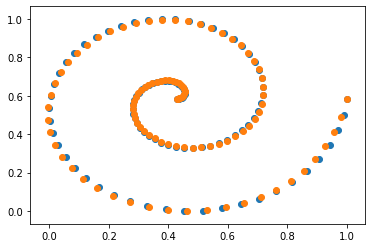

In [11]:
ps= np.array([model.predict([t[i]])[0] for i in range(len(t))])
plt.scatter(bx, by)
plt.scatter(ps[:,0], ps[:,1])
plt.show()